In [124]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
%autoreload 2
import hippo3 as hippo
import os
import molparse as mp
import mcol

In [138]:
os.system('rm -v test.db')

removed 'test.db'


0

In [139]:
animal = hippo.HIPPO('2A_hippo3', 'test.db')
print(animal)

Creating HIPPO animal
name = 2A_hippo3
db_path = test.db
DEBUG: hippo3.Database.__init__()
DEBUG: Database.path = test.db
DEBUG: hippo3.Database.connect()
DEBUG: sqlite3.version='2.6.0'
 SUCCESS  Database connected @ test.db!
Creating blank database...
DEBUG: HIPPO.Database.create_table_compound()
DEBUG: HIPPO.Database.create_table_inspiration()
DEBUG: HIPPO.Database.create_table_reaction()
DEBUG: HIPPO.Database.create_table_reactant()
DEBUG: HIPPO.Database.create_table_pose()
DEBUG: HIPPO.Database.create_table_tag()
DEBUG: HIPPO.Database.create_table_quote()
DEBUG: HIPPO.Database.create_table_pattern_bfp()
 SUCCESS  Initialised animal HIPPO("2A_hippo3")!
HIPPO("2A_hippo3")


In [140]:
print(animal.compounds)
print(animal.poses)

set(C x 0)
set(P x 0)


# insert test data

In [141]:
animal.db.insert_compound(name='x0310', smiles='Cc1nn(C)c(C)c1NC(=O)CC#N', tags=['hits'])
animal.db.insert_compound(name='x0152', smiles='O=C(COc1ccccc1)N2CCNC(=O)C2', tags=['hits'])
animal.db.insert_compound(name='base1', smiles='Cc1nn(C)c(C)c1NC(=O)Oc2ccccc2', tags=['base'])
animal.db.insert_compound(name='elab1', smiles='Cc1nn(C)c(C)c1NC(=O)Oc2cccc(Cl)c2', base=animal.compounds['base1'], tags=['elab'])
animal.db.insert_compound(name='elab2', smiles='Cc2nn1CC=CCc1c2NC(=O)Oc3ccccc3', base=animal.compounds['base1'], tags=['elab'])
animal.db.insert_compound(name='bb1', smiles='Cc2nn1CC=CCc1c2NC(=O)', tags=['reactant'])
animal.db.insert_compound(name='bb2', smiles='Oc3ccccc3', tags=['reactant'])
animal.db.insert_compound(name='bb3', smiles='CC', tags=['reactant'])
animal.compounds

set(C x 8)

In [142]:
animal.db.insert_pose(compound=animal.compounds['x0310'], name='0A', target='A71EV2A', path='/dev/null', tags=['hits'])
animal.db.insert_pose(compound=animal.compounds['x0310'], name='1A', target='A71EV2A', path=None, tags=['hits'])
animal.db.insert_pose(compound=animal.compounds['x0152'], name='0B', target='A71EV2A', path=None, tags=['hits'])
animal.db.insert_pose(compound=animal.compounds['base1'], name='a', target='A71EV2A', path=None, tags=['hits'])
animal.db.insert_pose(compound=animal.compounds['elab1'], name='a', target='A71EV2A', path='/tmp/elab1', tags=['hits'])
animal.db.insert_pose(compound=animal.compounds['elab1'], name='a', target='A71EV2A', path=None, tags=['hits'])
animal.poses

 ERROR  Path cannot be resolved: /tmp/elab1!


set(P x 5)

In [143]:
animal.db.insert_inspiration(derivative=animal.poses['A71EV2A_base1_a'], original=animal.poses['A71EV2A_x0310_0A'])
animal.db.insert_inspiration(derivative=animal.compounds['base1'].get_poses()[0], original=animal.poses['A71EV2A_x0152_0B'])

2

In [144]:
animal.db.insert_reaction(type='Amidation', product=animal.compounds['base1'])

1

In [145]:
animal.db.insert_reactant(compound=animal.compounds['bb1'], reaction=animal.db.get_reaction(id=1), amount=1)
animal.db.insert_reactant(compound=animal.compounds['bb2'], reaction=animal.db.get_reaction(id=1), amount=1)

2

In [146]:
animal.db.insert_quote(compound=animal.compounds['bb1'], 
                       supplier='Enamine', catalogue='BB', entry='Z0123456789', 
                       amount=21, price=100, currency='USD', lead_time=20)

1

In [147]:
animal.db.insert_quote(compound=animal.compounds['bb1'], 
                       supplier='Enamine', catalogue='BB', entry='Z0123456789', 
                       amount=5, price=30, currency='USD', lead_time=20)

2

In [148]:
animal.db.insert_quote(compound=animal.compounds['bb2'], 
                       supplier='Enamine', catalogue='BB', entry='Z0123456790', 
                       amount=21, price=100, currency='USD', lead_time=20)

3

In [149]:
animal.db.insert_quote(compound=animal.compounds['bb3'], 
                       supplier='Enamine', catalogue='BB', entry='Z0123456791', 
                       amount=21, price=100, currency='USD', lead_time=20)

4

# test multi-step reactions

1. bb1 + bb2 --> base1
2. base1 + bb3 --> elab1

**step 1. added above**

In [150]:
animal.db.insert_reaction(type='Suzuki', product=animal.compounds['elab1'], product_yield=0.8)

2

In [151]:
animal.db.insert_reactant(compound=animal.compounds['base1'], reaction=animal.db.get_reaction(id=2), amount=1)
animal.db.insert_reactant(compound=animal.compounds['bb3'], reaction=animal.db.get_reaction(id=2), amount=2)

4

# test repr's

In [152]:
animal.compounds

set(C x 8)

In [153]:
animal.compounds[1]

C1 "x0310"

In [154]:
animal.poses

set(P x 5)

In [155]:
animal.poses[1]

C1->P1 "A71EV2A_x0310_0A"

In [156]:
animal.compounds['bb1'].get_quotes()

[21.0 mg of "Z0123456789" in Enamine BB for 100.0 USD in 20 days,
 5.0 mg of "Z0123456789" in Enamine BB for 30.0 USD in 20 days]

# test compound

In [157]:
comp = animal.compounds['base1']

In [158]:
comp.id

3

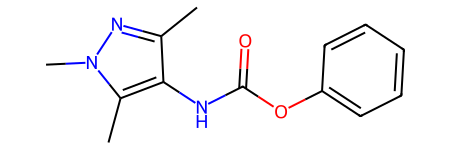

In [159]:
comp.mol

In [160]:
comp.tags

{'base'}

## test quoting data

In [161]:
animal.compounds['bb1'].get_quotes()

[21.0 mg of "Z0123456789" in Enamine BB for 100.0 USD in 20 days,
 5.0 mg of "Z0123456789" in Enamine BB for 30.0 USD in 20 days]

In [162]:
comp.get_quotes()

 ERROR  No entry in quote with quote_compound=3!


[]

## test synthesis data

In [163]:
recipe = animal.compounds['base1'].get_reactions()[0].summary(amount=3)

R1.id=1
R1.type=Amidation
R1.product=3
R1.product_yield=1.0
R1.reactants=[(C6 "bb1", 1.0), (C7 "bb2", 1.0)]
Ingredients for 3 mg of product:
[3.00mg of C6 "bb1", 3.00mg of C7 "bb2"]


In [164]:
recipe

Recipe(ingredients=[3.00mg of C6 "bb1", 3.00mg of C7 "bb2"], reactions=[R1])

In [165]:
for t in recipe.ingredients:
    print(t.quote)

5.0 mg of "Z0123456789" in Enamine BB for 30.0 USD in 20 days
21.0 mg of "Z0123456790" in Enamine BB for 100.0 USD in 20 days


In [166]:
animal.compounds['elab1'].get_reactions()[0].summary()

R2.id=2
R2.type=Suzuki
R2.product=4
R2.product_yield=0.8
R2.reactants=[(C3 "base1", 1.0), (C8 "bb3", 2.0)]
Ingredients for 1 mg of product:
[1.25mg of C6 "bb1", 1.25mg of C7 "bb2", 2.50mg of C8 "bb3"]


Recipe(ingredients=[1.25mg of C6 "bb1", 1.25mg of C7 "bb2", 2.50mg of C8 "bb3"], reactions=[R1, R2])

# test pose

In [ ]:
pose = comp.poses[0]
pose

In [ ]:
pose.inspirations

# test query

In [ ]:
a = animal.db.query_substructure('Cc1nn(C)c(C)c1NC(=O)CC#N')
b = animal.db.query_substructure('c1nn(C)cc1')
c = animal.db.query_substructure('O=C(COc1ccccc1)N2CCNC(=O)C2')
a,b,c

In [ ]:
a = animal.db.query_similarity('Cc1nn(C)c(C)c1NC(=O)CC#N', 0.6, return_similarity=True)
b = animal.db.query_similarity('Cc1nn(C)c(C)c1NC(=O)CC#N', 0.2, return_similarity=True)
c = animal.db.query_exact('Cc1nn(C)c(C)c1NC(=O)CC#N')
a, b, c

In [ ]:
display(mp.rdkit.mol_from_smiles('Cc1nn(C)c(C)c1NC(=O)CC#N'))
mp.rdkit.mol_from_smiles('c1nn(C)cc1')

In [ ]:
animal.db.execute("SELECT compound_name, compound_smiles, compound_base FROM compound")
animal.db.cursor.fetchall()

In [ ]:
animal.db.execute("SELECT inspiration_original, inspiration_derivative FROM inspiration")
animal.db.cursor.fetchall()

In [ ]:
animal.db.execute(f'PRAGMA table_info(compound_mfp);')
animal.db.cursor.fetchall()

In [ ]:
animal.db.execute(f'PRAGMA table_info(compound);')
animal.db.cursor.fetchall()